In [15]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data_path = "../sum_data-0.csv"
data = pd.read_csv(data_path)
# Show the first 5 rows of the dataframe.
data.head()

,data,label
0,job posting - apple-iss research center conten...,0.0
1,"lang classification grimes , joseph e . and b...",0.0
2,query : letter frequencies for text identifica...,0.0
3,risk a colleague and i are researching the dif...,0.0
4,request book information earlier this morning ...,0.0


In [36]:
# Drop rows with NaN values in 'data' column and convert all entries to strings
data.dropna(subset=['data'], inplace=True)
data['data'] = data['data'].astype(str)

In [37]:
#  Tokenization and sequence conversion
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token='<OOV>')

# Fit the tokenizer on the data
tokenizer.fit_on_texts(data['data'])

# Convert the text to sequences
sequences = tokenizer.texts_to_sequences(data['data'])

padded_sequences  = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post')

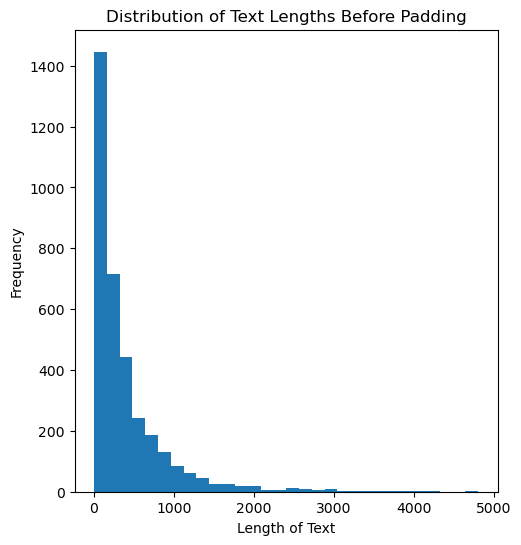

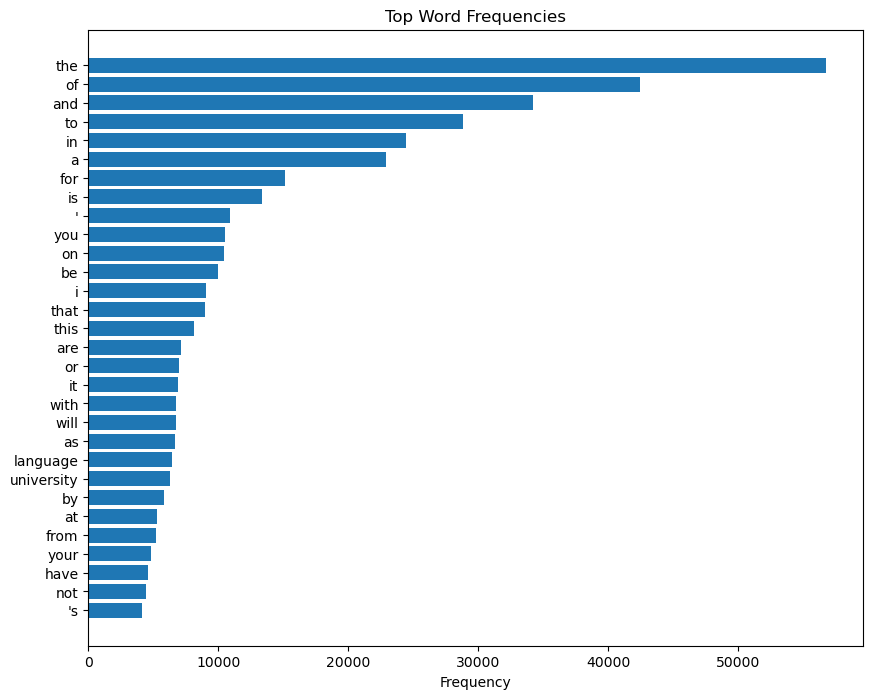

In [61]:
# Calculate text lengths
text_lengths = [len(x) for x in sequences]

# Plotting the distribution of text lengths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(text_lengths, bins=30)
plt.title('Distribution of Text Lengths Before Padding')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')

# Extract word frequency
word_counts = tokenizer.word_counts
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Get top N words to plot
top_words = sorted_word_counts[:30]  # adjust N to your preference
words = [w[0] for w in top_words]
frequencies = [w[1] for w in top_words]

# Plotting word frequency
plt.figure(figsize=(10, 8))
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.title('Top Word Frequencies')
plt.gca().invert_yaxis()  # invert y-axis to have the highest frequencies on top
plt.show()


In [45]:
# Model definition

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16, input_length=padded_sequences.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# Model training
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'], test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=30, batch_size=16 ,validation_data=(X_test, y_test))

Epoch 1/30
176/176 [==============================] - 3s 11ms/step - loss: 0.6405 - accuracy: 0.6758 - val_loss: 0.6048 - val_accuracy: 0.7031
Epoch 2/30
176/176 [==============================] - 2s 10ms/step - loss: 0.6158 - accuracy: 0.6801 - val_loss: 0.5989 - val_accuracy: 0.7031
Epoch 3/30
176/176 [==============================] - 2s 10ms/step - loss: 0.5830 - accuracy: 0.6801 - val_loss: 0.5435 - val_accuracy: 0.7031
Epoch 4/30
176/176 [==============================] - 2s 9ms/step - loss: 0.5115 - accuracy: 0.7025 - val_loss: 0.4848 - val_accuracy: 0.8608
Epoch 5/30
176/176 [==============================] - 2s 10ms/step - loss: 0.4204 - accuracy: 0.8265 - val_loss: 0.3787 - val_accuracy: 0.9503
Epoch 6/30
176/176 [==============================] - 2s 9ms/step - loss: 0.3407 - accuracy: 0.9367 - val_loss: 0.3167 - val_accuracy: 0.9446
Epoch 7/30
176/176 [==============================] - 2s 10ms/step - loss: 0.2817 - accuracy: 0.9424 - val_loss: 0.2755 - val_accuracy: 0.9616
E

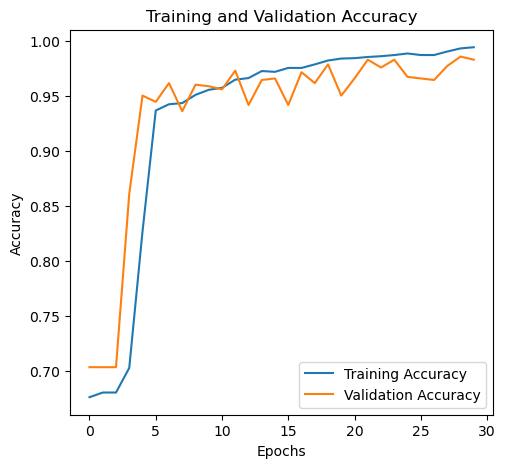

In [47]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

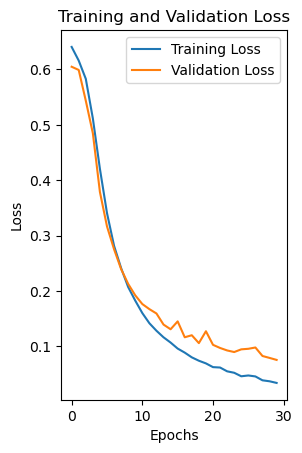

In [48]:
# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [63]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

22/22 [==============================] - 0s 8ms/step - loss: 0.0758 - accuracy: 0.9830
Test Accuracy: 98.30%


In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer matrix visualization

22/22 [==============================] - 0s 5ms/step


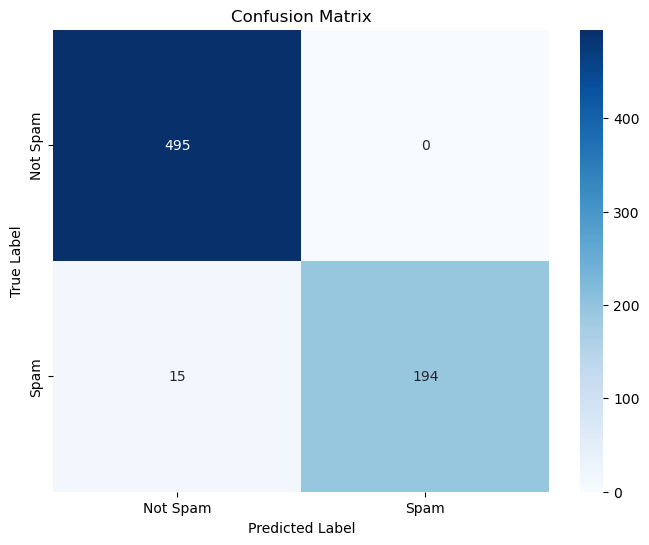

In [92]:
# Predict the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.85).astype(int)  # Convert probabilities to binary output

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [64]:
# Save the model
model.save('model_dnn.h5')  # Saves to HDF5 file


In [65]:
from tensorflow.keras.models import load_model

In [66]:
load_model = load_model('model_dnn.h5')

In [69]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Restored model accuracy: {accuracy*100:.2f}%")
# Making predictions
predictions = model.predict(X_test)

22/22 [==============================] - 0s 5ms/step - loss: 0.0758 - accuracy: 0.9830
Restored model accuracy: 98.30%
Data : [[ 241    4  390 ...    0    0    0]
 [ 314   58    1 ...    0    0    0]
 [  97  284    4 ...    0    0    0]
 ...
 [  29   11 1128 ...    0    0    0]
 [ 145    1   23 ...    0    0    0]
 [4411  582  607 ...    0    0    0]]
22/22 [==============================] - 0s 5ms/step


In [71]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [87]:
# Example text
text_not_spam = "Hey! How are you doing. Let's catch up soon!"

text_spam = "Congratulations! You've been selected as a winner. Text WON to 44255 to claim your prize."

# Tokenize the text
sequence = tokenizer.texts_to_sequences([text_not_spam])

# Pad the sequence
padded_sequence = pad_sequences(sequence, maxlen=padded_sequences.shape[1], padding='post')

# Predict using the model
prediction = model.predict(padded_sequence)
print("Prediction:", prediction)

# You can add a threshold to classify the prediction as 'spam' or 'not spam'
is_spam = prediction[0][0] > 0.85  # Assuming sigmoid output, change threshold as needed
print("Is the message spam?:", "Yes" if is_spam else "No")

1/1 [==============================] - 0s 20ms/step
Prediction: [[0.83604676]]
Is the message spam?: No
